In [1]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[0] for x in points]
    ys = [y[1] for y in points]
    
    plt.scatter(xs, ys)

In [2]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def loss(weights):
    predictions = logisticPrediction(weights, points)
#     crossEntropy = (targets*np.log(predictions) + (1-targets)*np.log(1-predictions))
    r = responsibility(weights, points)
    notLocal = list(map(lambda x: not (r[x] < 0.5 ),range(0, len(points))))
    
    crossEntropyRScaled = r * (crossEntropy(targets, predictions))
    opositeCrossEntropyRScaled = r * (crossEntropy(1-targets, predictions))
    
    local = np.array([crossEntropyRScaled[i] for i in range(0, len(points)) if notLocal[i] == False])
    outside = np.array([opositeCrossEntropyRScaled[i] for i in range(0, len(points)) if notLocal[i] == True])
    
    localLoss = 0
    if not len(local) == 0:
#         print("LOCAL EMPTY")
        localLoss = (1/len(local)) * np.sum(local)
    
    outsideLoss = 0
    if not len(outside) == 0:
#         print("OUTSIDE EMPTY")
        outsideLoss = (1/len(outside)) * np.sum(outside)
    
    return -(localLoss + outsideLoss)
    
#     nonLocalPoints = np.array([points[i] for i in range(0, len(points)) if notLocal[i] == True])
#     nonLocalTargets = np.array([targets[i] for i in range(0, len(points)) if notLocal[i] == True])
#     nonLocalPredictions = np.array([predictions[i] for i in range(0, len(points)) if notLocal[i] == True])
#     nonLocalR = np.array([r[i] for i in range(0, len(points)) if notLocal[i] for i in range(0, len(points)) if notLocal[i] == True])

#     return -(1/len(localPoints)) * (np.sum(crossEntropy(localTargets, localPredictions))) -(1/len(nonLocalPoints)) * (np.sum(nonLocalR * invCrossEntropy(nonLocalTargets, nonLocalPredictions)))
    
def crossEntropy(t, p):
    return t * np.log(p) + (1-t) * np.log(1-p)

def logisticPrediction(weights, p):
    return np.array(list(map(lambda x: predict(weights, x), p))) 
    
def predict(weights, inputs):
    n = np.array([weights[0], weights[1]])
    i = np.array([weights[2] - inputs[0], weights[3] - inputs[1]])
    return sigmoid(np.dot(n, i))

def responsibility(weights, points):
    r = np.absolute(weights[4])
    a = np.array([weights[2], weights[3]])
    
    dif = np.array(list(map(lambda x: x - a, points)))
    s = np.array(list(map(lambda x: np.sum(np.power(x, 2)), dif)))
    d = np.sqrt(s)

    t = 1 - f(d, r)
    return t

def f(d, r):
    return 1/(1 + np.power(np.e, -(d-r)))
#     return 1/(1 + np.power(np.e, 10*(d-r)))

In [3]:
def trainBoundaryHunter():
    weights = np.array([0.0, 0.0, 0.0, 0.0, 0.3])
    gradient = grad(loss)
    print("Initial Loss: ", loss(weights))
    for i in range(0, 10000):
        g = gradient(weights)
        
        if i % 1000 == 0:
            print("Loss [i = " + str(i) + "]: " + str(loss(weights)))
            print(weights)
            checkGrad(0.00001, 0.0001, weights, g)
        
#         weights = computeStep(weights)
        weights -= 0.001 * g
        if weights[4] < 0:
            weights[4] = 0
            
    print("Trained Loss: ", loss(weights))    
    print("Weights: ", weights)
    return weights

def checkGrad(pterb, threshold, weights, g):
    grad = np.zeros(len(weights))
    for i in range(0, len(weights)):
        p = np.zeros(len(weights))
        p[i] = pterb
        
        lossBefore = loss(weights)
        lossAfter = loss(weights + p)
        
        grad[i] = (lossAfter - lossBefore)/pterb
        

    return grad

    dif = np.absolute(computedGrad - grad)
    for d in dif:
        if d > threshold:
            print("ERROR")
    

Type 0:  35
Type 1:  65
Initial Loss:  0.612553827648
Loss [i = 0]: 0.612553827648
[ 0.   0.   0.   0.   0.3]
Loss [i = 1000]: 0.224555983405
[ 0.00527843 -0.05153148 -0.05207263 -0.01960584  0.07782886]


/usr/pkg/lib/python3.6/site-packages/autograd/core.py:133: RuntimeWarning: invalid value encountered in true_divide
  result = self.fun(*argvals, **kwargs)


Loss [i = 2000]: nan
[ nan  nan  nan  nan  nan]
Loss [i = 3000]: nan
[ nan  nan  nan  nan  nan]
Loss [i = 4000]: nan
[ nan  nan  nan  nan  nan]
Loss [i = 5000]: nan
[ nan  nan  nan  nan  nan]
Loss [i = 6000]: nan
[ nan  nan  nan  nan  nan]
Loss [i = 7000]: nan
[ nan  nan  nan  nan  nan]
Loss [i = 8000]: nan
[ nan  nan  nan  nan  nan]
Loss [i = 9000]: nan
[ nan  nan  nan  nan  nan]
Trained Loss:  nan
Weights:  [ nan  nan  nan  nan  nan]

[ nan  nan  nan]

Line
B: nan
XCoef: nan


/usr/pkg/lib/python3.6/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/pkg/lib/python3.6/site-packages/matplotlib/contour.py:1535: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


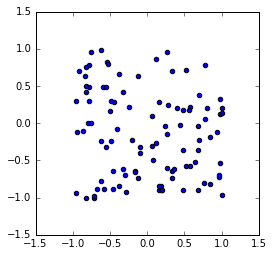

In [4]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

weights = trainBoundaryHunter()

# plt.scatter(weights[1], weights[2])
plt.scatter(weights[2], weights[3])

n = np.array([weights[0] * weights[2] + weights[1] * weights[3], 
              -weights[0], 
              -weights[1]])

byas = -1 * n[0]/n[2]
Xcoef = -1 * n[1]/n[2]

x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x,y)
F = ((X - weights[2]))**2 + ((Y - weights[3]))**2 - weights[4]**2
plt.contour(X,Y,F,[0])

print()
print(n)
print("\nLine")
print("B: " + str(byas))
print("XCoef: " + str(Xcoef))

plt.plot([-1.0, 1.0], [-1*Xcoef + byas, Xcoef + byas], 'k-')
plt.gca().set_aspect('equal')

plt.show()